<a href="https://colab.research.google.com/github/iwatsuki-yuuki/intern/blob/main/indeed%E6%B1%82%E4%BA%BA%E5%88%86%E6%9E%90%E3%83%84%E3%83%BC%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# ドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# matplotが日本語データの出力できなかったから日本語フォントをインストールした（以下のURL参照）
# https://qiita.com/sumikei11/items/49fab821a7c80cbfe020
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 86.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=2b30018bd763a412b9a7bcf1f78c040e1908083e15eed6c4ed0f0d642509be92
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib


In [61]:
# 必要なライブラリをインポートする
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib # 日本語の文字化け防止
from sklearn.linear_model import LinearRegression
# import unicodedata # 求人の文字列の正規化を行うために必要なライブラリ（今回は必要なかった）

In [30]:
# ドライブのcsvファイルを拾ってきて可視化する
fn1='drive/MyDrive/intern/indeed_analysis/JobsCampaigns_20250301_20250331.csv'
fn2='drive/MyDrive/intern/indeed_analysis/JobsCampaigns_20250401_20250430.csv'
fn3='drive/MyDrive/intern/indeed_analysis/JobsCampaigns_20250501_20250526.csv'

#dfにする
df1 = pd.read_csv(fn1, header = 0)
df2 = pd.read_csv(fn2, header = 0)
df3 = pd.read_csv(fn3, header = 0)

# 縦方向に上の3つのcsvを統合（concat関数）
df_all = pd.concat([df1, df2, df3])
df_all.head(5)

,求人,国,都道府県,市区町村,企業名,参照番号,作成日,最終更新日,掲載元サイト,表示回数,...,応募完了率,応募数,応募率 (AR),費用,クリック単価（CPC）,応募開始単価（CPAS）,応募単価（CPA）,求人URL,カテゴリー,求人のステータス
0,【大手ガス会社】ガス開閉栓スタッフ/警報器担当スタッフ,日本,大阪府,"大阪市, 住之江区",株式会社ハーツ住之江支店,76026741-2-1,2025年2月7日,2025年2月28日,Indeed,122,...,0.0,0,0.0,2457,273.000000,0.0,0.0,http://jp.indeed.com/job/%E5%A4%A7%E6%89%8B%E3...,"dae_hearts.saiyou@masterkey-inc.com,dae_ouboka...",募集終了
1,【大手ガス会社】ガス開閉栓スタッフ/警報器担当スタッフ,日本,大阪府,藤井寺市,株式会社ハーツ住之江支店,76026741-2-3,2025年3月6日,2025年3月6日,Indeed,249,...,0.0,0,0.0,4305,205.000000,0.0,0.0,http://jp.indeed.com/job/%E5%A4%A7%E6%89%8B%E3...,"dae_hearts.saiyou@masterkey-inc.com,dae_ouboka...",募集終了
2,【大手ガス会社】ガス開閉栓スタッフ/警報器担当スタッフ,日本,大阪府,富田林市,株式会社ハーツ住之江支店,76026741-2-4,2025年2月7日,2025年3月12日,Indeed,9,...,0.0,0,0.0,37,37.000000,0.0,0.0,http://jp.indeed.com/job/%E5%A4%A7%E6%89%8B%E3...,"dae_hearts.saiyou@masterkey-inc.com,dae_ouboka...",募集終了
3,【大手ガス会社】ガス開閉栓スタッフ/警報器担当スタッフ,日本,大阪府,富田林市,株式会社ハーツ住之江支店,76026741-19-1,2025年3月13日,2025年3月13日,Indeed,443,...,0.0,0,0.0,4151,138.366667,0.0,0.0,http://jp.indeed.com/job/%E5%A4%A7%E6%89%8B%E3...,"dae_hearts.saiyou@masterkey-inc.com,dae_ouboka...",募集終了
4,【大手ガス会社】ガス開閉栓スタッフ/警報器担当スタッフ,日本,大阪府,"大阪市, 住之江区",株式会社ハーツ住之江支店,76026741-19-2,2025年3月13日,2025年3月26日,Indeed,87,...,0.0,0,0.0,1723,344.600000,1723.0,0.0,http://jp.indeed.com/job/%E5%A4%A7%E6%89%8B%E3...,"dae_hearts.saiyou@masterkey-inc.com,dae_ouboka...",募集終了


In [32]:
# 列名の確認
# print(df_all.columns.tolist())

In [36]:
# 求人名をタイトルでgroupbyする
# 今回は勤務地のデータを無視し、タイトルでくくる
# ここで求人をgroupbyでくくりタイトルが何個あるのか件数というインデックス名でデータを出力する
df_all.groupby('求人').size().reset_index(name='件数')

,求人,件数
0,【大手インフラ企業】インフラを支える提案セールス/未経験可,1
1,【大手ガス会社】ガス開閉栓スタッフ/警報器担当スタッフ,9
2,【大手ガス会社】完全反響営業/ノルマ無し,1
3,【大手ガス会社】警報器担当スタッフ/ガス開閉栓,8
4,【未経験可】ガス開閉栓・警報器スタッフ/大手ガス会社,3
5,【未経験可】大手ガス会社/インフラを支えるまごころ巡回スタッフ,2
6,【未経験可】施工スタッフ【ガス開閉栓・警報器担当】,6
7,【未経験枠】まごころ巡回/大手ガスインフラ会社,8
8,【未経験枠】インフラ関係のまごころ巡回/大手ガス会社,7
9,まごころ巡回スタッフ/大手ガス代理店【未経験可】,2


In [39]:
# x軸をクリック率、y軸を応募率とした散布図を求める
# この時散布図の各データは求人名ごとに括る
# クリック率と応募率は上で出力した件数で割り各々の平均を求める
# aggは辞書形式で「列名：集計関数」を指定できる
# groupby() の結果はインデックスが '求人' になるのでreset_index() を使うと、その '求人' を普通の列として扱えるようになる
df_grouped = df_all.groupby('求人').agg({'クリック率（CTR）': 'mean', '応募率 (AR)': 'mean'}).reset_index()
df_grouped

,求人,クリック率（CTR）,応募率 (AR)
0,【大手インフラ企業】インフラを支える提案セールス/未経験可,0.054321,0.000000
1,【大手ガス会社】ガス開閉栓スタッフ/警報器担当スタッフ,0.069229,0.016461
2,【大手ガス会社】完全反響営業/ノルマ無し,0.057143,0.000000
3,【大手ガス会社】警報器担当スタッフ/ガス開閉栓,0.062599,0.005512
4,【未経験可】ガス開閉栓・警報器スタッフ/大手ガス会社,0.049762,0.000000
5,【未経験可】大手ガス会社/インフラを支えるまごころ巡回スタッフ,0.035234,0.000000
6,【未経験可】施工スタッフ【ガス開閉栓・警報器担当】,0.050412,0.000000
7,【未経験枠】まごころ巡回/大手ガスインフラ会社,0.071261,0.020833
8,【未経験枠】インフラ関係のまごころ巡回/大手ガス会社,0.043777,0.014286
9,まごころ巡回スタッフ/大手ガス代理店【未経験可】,0.072554,0.000000


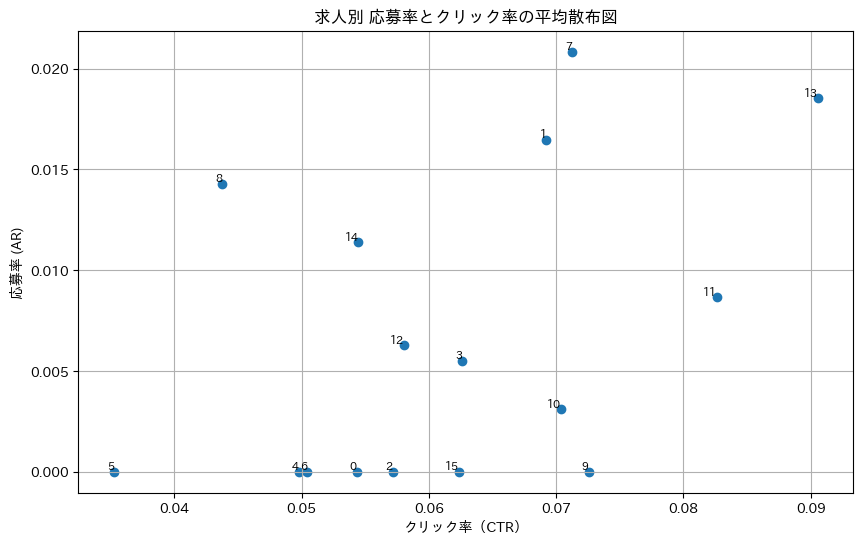

In [70]:
plt.figure(figsize=(10, 6)) # 図のサイズを設定
plt.scatter(df_grouped['クリック率（CTR）'], df_grouped['応募率 (AR)']) # 散布図を作成
for i in df_grouped.index:
    x = df_grouped.at[i, 'クリック率（CTR）']
    y = df_grouped.at[i, '応募率 (AR)']
    plt.text(x, y, str(i), fontsize=8, ha='right', va='bottom')
plt.ylabel('応募率 (AR)') # ラベル
plt.xlabel('クリック率（CTR）')
plt.title('求人別 応募率とクリック率の平均散布図')
plt.grid(True) # 背景の点線（グリッド表示）
plt.show()

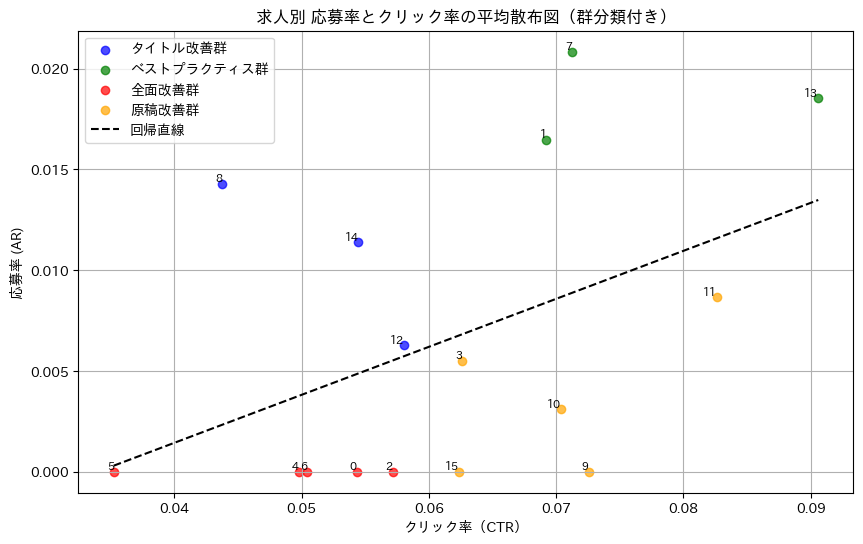

In [69]:
# 上記のデータをもとに4象限分析を行う
# 分析観点は以下の通り
#  - タイトル良好・原稿良好（両方高い）= ベストプラクティス群
#  - タイトル改善・原稿良好（クリック率低・応募率高）= タイトル改善群
#  - タイトル良好・原稿改善（クリック率高・応募率低）= 原稿改善群
#  - 両方改善（両方低い）= 全面改善群

# X（応募率）、Y（クリック率）
# X（特徴量）は 2次元配列（形状は (サンプル数, 特徴量数)）でなければいけない。ここでは応募率のみなので特徴量数
X = df_grouped[['クリック率（CTR）']].values
y = df_grouped['応募率 (AR)'].values

# 線形回帰モデルの作成・学習
model = LinearRegression()
model.fit(X, y)

# 回帰直線の予測値
y_pred = model.predict(X)

# 回帰線による予測との差（上/下）で分類
# np.where(条件, 真のときの値, 偽のときの値)
df_grouped['分類'] = np.where(y > y_pred, '応募率が高い群（原稿良好）', '応募率が低い群（原稿要改善）')
# 1次元配列に戻してから中央値と比較している（今回は応募率が0の値が多いので要調整）
df_grouped['位置'] = np.where(X.flatten() > np.median(X), '応募率高', '応募率低')

# データを分類する関数（rowには前に作った分類と位置の列）
def classify(row):
    if row['分類'] == '応募率が高い群（原稿良好）':
        if row['位置'] == '応募率低':
            return 'タイトル改善群'
        else:
            return 'ベストプラクティス群'
    else:
        if row['位置'] == '応募率低':
            return '全面改善群'
        else:
            return '原稿改善群'

# groupbyに群という列を挿入
# df_grouped の各行を順番に row という引数に渡して classify() 関数を実行

# 例
# df = pd.DataFrame({
#     '名前': ['田中', '佐藤'],
#     '国語': [80, 70],
#     '数学': [90, 85]
# })

# # 平均点を計算する関数
# def calc_avg(row):
#     return (row['国語'] + row['数学']) / 2

# df['平均点'] = df.apply(calc_avg, axis=1)


df_grouped['群'] = df_grouped.apply(classify, axis=1)

# プロット
plt.figure(figsize=(10, 6))

# 色分けして点を描く
colors = {
    'ベストプラクティス群': 'green',
    'タイトル改善群': 'blue',
    '原稿改善群': 'orange',
    '全面改善群': 'red'
}

# groupにはグループ名、dataにはその行のdfが入る
for group, data in df_grouped.groupby('群'):
    plt.scatter(data['クリック率（CTR）'], data['応募率 (AR)'],
                label=group, color=colors[group], alpha=0.7)
    for i in data.index:
        x = data.at[i, 'クリック率（CTR）']
        y = data.at[i, '応募率 (AR)']
        plt.text(x, y, str(i), fontsize=8, ha='right', va='bottom')

# 回帰直線を描く
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='black', linestyle='--', label='回帰直線')

# ラベルなど
plt.xlabel('クリック率（CTR）')
plt.ylabel('応募率 (AR)')
plt.title('求人別 応募率とクリック率の平均散布図（群分類付き）')
plt.legend()
plt.grid(True)
plt.show()

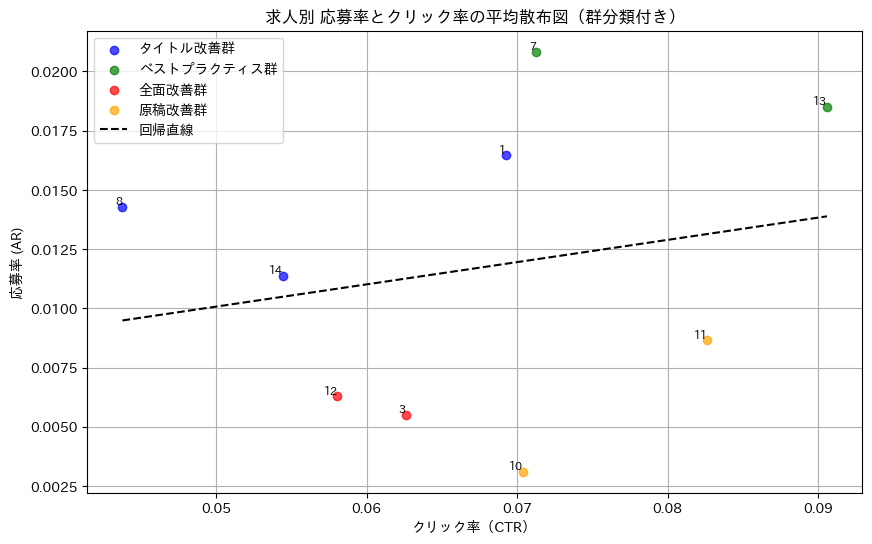

In [71]:
# 応募率が0のものを省いて回帰分析（外れ値）
# 以下の一行だけを追加
# 応募率が0のデータを除外
df_grouped = df_grouped[df_grouped['応募率 (AR)'] > 0].copy()

# X（クリック率）、Y（応募率）
X = df_grouped[['クリック率（CTR）']].values
y = df_grouped['応募率 (AR)'].values

# 線形回帰モデルの作成・学習
model = LinearRegression()
model.fit(X, y)

# 回帰直線の予測値
y_pred = model.predict(X)

# 回帰線による予測との差（上/下）で分類
df_grouped['分類'] = np.where(y > y_pred, '応募率が高い群（原稿良好）', '応募率が低い群（原稿要改善）')

# 応募率の中央値で位置分類（1次元配列に変換して比較）
df_grouped['位置'] = np.where(X.flatten() > np.median(X), '応募率高', '応募率低')

# 群分類の関数
def classify(row):
    if row['分類'] == '応募率が高い群（原稿良好）':
        if row['位置'] == '応募率低':
            return 'タイトル改善群'
        else:
            return 'ベストプラクティス群'
    else:
        if row['位置'] == '応募率低':
            return '全面改善群'
        else:
            return '原稿改善群'

# 群を割り当て
df_grouped['群'] = df_grouped.apply(classify, axis=1)

# プロット
plt.figure(figsize=(10, 6))

colors = {
    'ベストプラクティス群': 'green',
    'タイトル改善群': 'blue',
    '原稿改善群': 'orange',
    '全面改善群': 'red'
}

for group, data in df_grouped.groupby('群'):
    plt.scatter(data['クリック率（CTR）'], data['応募率 (AR)'],
                label=group, color=colors[group], alpha=0.7)
    for i in data.index:
        x = data.at[i, 'クリック率（CTR）']
        y = data.at[i, '応募率 (AR)']
        plt.text(x, y, str(i), fontsize=8, ha='right', va='bottom')

# 回帰直線の描画
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='black', linestyle='--', label='回帰直線')

# グラフの設定
plt.xlabel('クリック率（CTR）')
plt.ylabel('応募率 (AR)')
plt.title('求人別 応募率とクリック率の平均散布図（群分類付き）')
plt.legend()
plt.grid(True)
plt.show()